### Récupération du dataset

In [1]:
import kagglehub as kh
import pandas as pd

# Télécharger le dataset dans un dossier local
dataset_ref = "dileep070/heart-disease-prediction-using-logistic-regression"
path = kh.dataset_download(dataset_ref)

# Localiser le fichier CSV dans le dossier téléchargé
csv_file = f"{path}/framingham.csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file)

# Afficher les premières lignes
print(df.head())


d:\Sources\DS-Machine-Learning\Classification\my_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [2]:
display(df)
df.info()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Gestion des doublons et valeurs manquantes

In [3]:
# Vérifier l'absence de doublons
print(df.duplicated().sum())

# Education : remplacer les valeurs manquantes par la valeur la plus fréquente
df['education'] = df['education'].fillna(df['education'].mode()[0])

# Cigs Per Day : vérifier si les valeurs manquantes correspondent à des non-fumeurs
#display(df.loc[df['cigsPerDay'].isna()])

# Ce sont des fumeurs, on remplace les valeurs manquantes par la médiane
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())

# BPMeds : remplacer les valeurs manquantes par la valeur la plus fréquente
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

# TotChol : remplacer les valeurs manquantes par la médiane
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

# BMI : remplacer les valeurs manquantes par la médiane
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

# HeartRate : remplacer les valeurs manquantes par la médiane
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

# Glucose : remplacer les valeurs manquantes par la médiane
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

# Vérifier l'absence de valeurs nulles
print(df.isna().sum())

0
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### Vérification de la validité des données

In [4]:
# Vérifier l'ensemble des valeurs distinctes pour les données catégorielles
print(df['male'].unique())
print(df['education'].unique())
print(df['currentSmoker'].unique())
print(df['BPMeds'].unique())
print(df['prevalentStroke'].unique())
print(df['prevalentHyp'].unique())
print(df['diabetes'].unique())
print(df['TenYearCHD'].unique())

[1 0]
[4. 2. 1. 3.]
[0 1]
[0. 1.]
[0 1]
[0 1]
[0 1]
[0 1]


<Axes: >

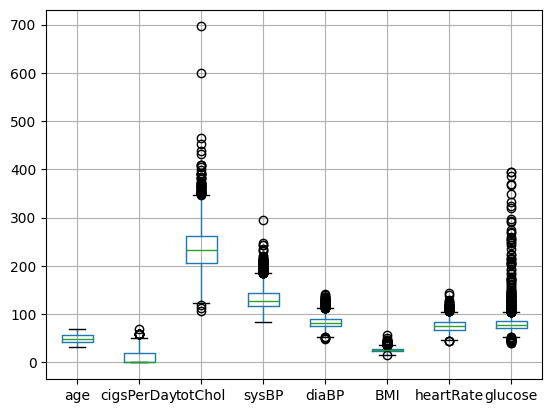

In [5]:
# Vérifier la distribution des données quantitatives avec des boxplots
df.boxplot(column=['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])
# Les données semblent cohérentes

### Exploration / analyse des relations entre les données

In [6]:
# Faire un tableau de contingence pour les variables catégorielles
display(pd.crosstab(df['male'], df['TenYearCHD'],normalize=0))
display(pd.crosstab(df['education'], df['TenYearCHD'],normalize=0))
display(pd.crosstab(df['currentSmoker'], df['TenYearCHD'],normalize=0))
display(pd.crosstab(df['BPMeds'], df['TenYearCHD'],normalize=0))
display(pd.crosstab(df['prevalentStroke'], df['TenYearCHD'],normalize=0))
display(pd.crosstab(df['prevalentHyp'], df['TenYearCHD'],normalize=0))
display(pd.crosstab(df['diabetes'], df['TenYearCHD'],normalize=0))

# Les 4 dernières variables semblent avoir un impact sur la variable cible


TenYearCHD,0,1
male,,
0,0.875568,0.124432
1,0.811435,0.188565


TenYearCHD,0,1
education,,
1.0,0.814247,0.185753
2.0,0.882682,0.117318
3.0,0.871907,0.128093
4.0,0.852008,0.147992


TenYearCHD,0,1
currentSmoker,,
0,0.854944,0.145056
1,0.840974,0.159026


TenYearCHD,0,1
BPMeds,,
0.0,0.853427,0.146573
1.0,0.669355,0.330645


TenYearCHD,0,1
prevalentStroke,,
0,0.849751,0.150249
1,0.560000,0.440000


TenYearCHD,0,1
prevalentHyp,,
0,0.890828,0.109172
1,0.753040,0.246960


TenYearCHD,0,1
diabetes,,
0,0.853718,0.146282
1,0.633028,0.366972


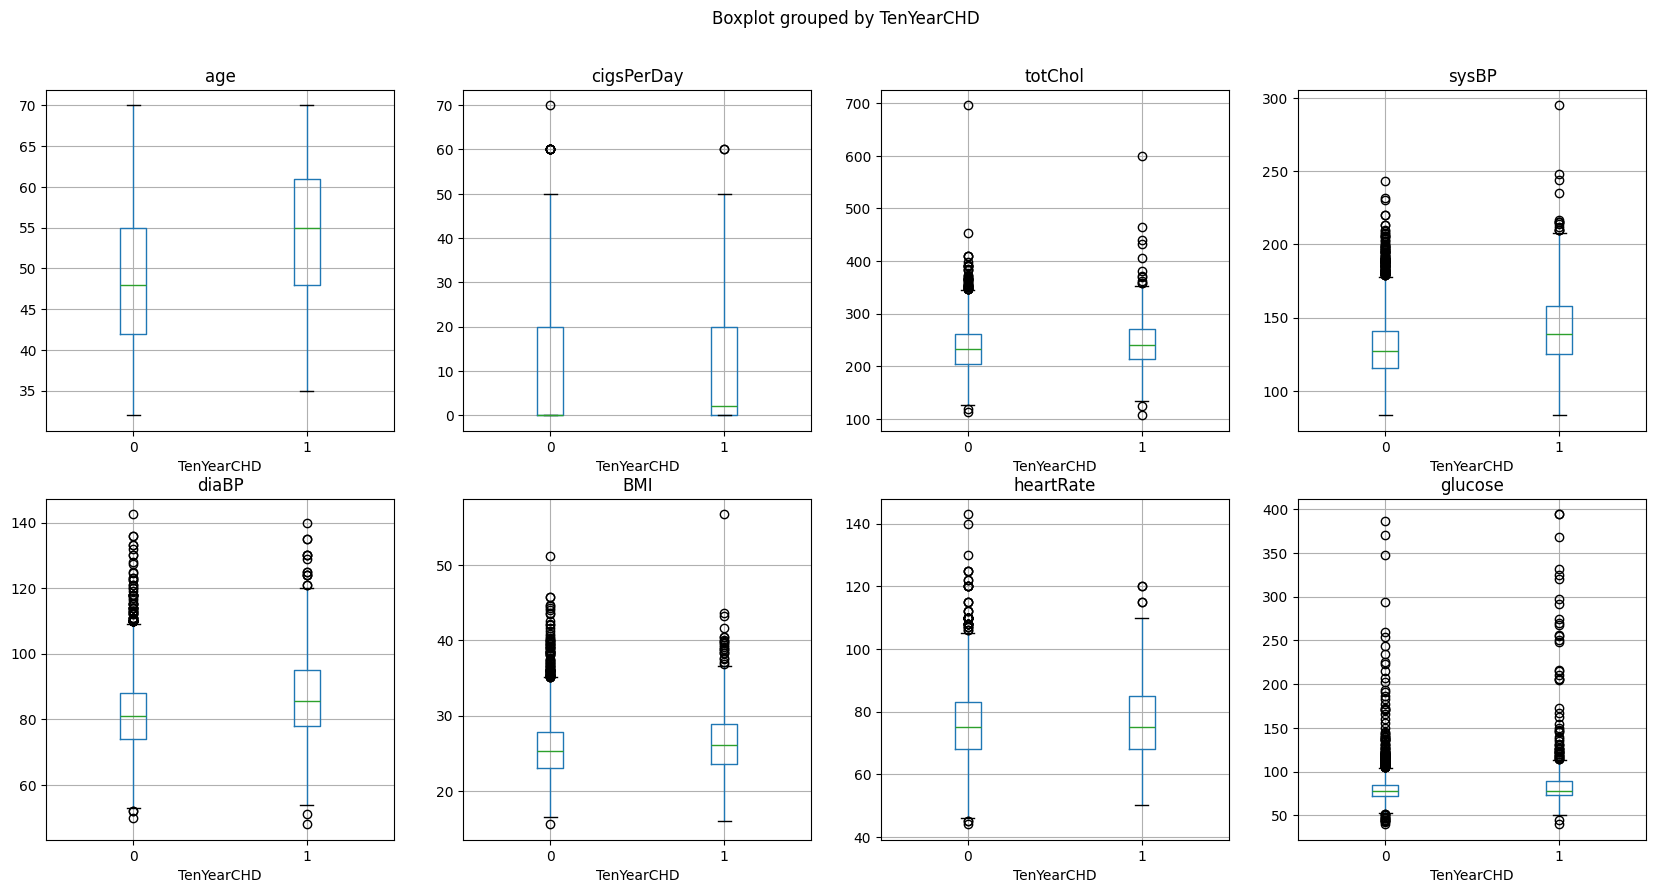

In [7]:
# Afficher avec Matplotlib les distributions des variables quantitatives en fonction de la variable cible
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
df.boxplot(column='age', by='TenYearCHD', ax=axs[0, 0])
df.boxplot(column='cigsPerDay', by='TenYearCHD', ax=axs[0, 1])
df.boxplot(column='totChol', by='TenYearCHD', ax=axs[0, 2])
df.boxplot(column='sysBP', by='TenYearCHD', ax=axs[0, 3])
df.boxplot(column='diaBP', by='TenYearCHD', ax=axs[1, 0])
df.boxplot(column='BMI', by='TenYearCHD', ax=axs[1, 1])
df.boxplot(column='heartRate', by='TenYearCHD', ax=axs[1, 2])
df.boxplot(column='glucose', by='TenYearCHD', ax=axs[1, 3])
plt.show()

# Les variables age, sysBP et diaBP semblent avoir un impact sur la variable cible

### Preprocessing

In [8]:
# On va donc garder uniquement les features age, sysBP, diaBP, BPMeds, prevalentHyp,prevalentStroke, diabetes
df_log_reg = df[['age', 'sysBP', 'diaBP', 'BPMeds', 'prevalentHyp', 'prevalentStroke', 'diabetes', 'TenYearCHD']]

# Discrétiser les variables age, sysBP et diaBP en 4 classes de même effectif
df_log_reg['age'] = pd.qcut(df_log_reg['age'], q=4, labels=['bas', 'moyen', 'moyen+', 'élevé'])
df_log_reg['sysBP'] = pd.qcut(df_log_reg['sysBP'], q=4, labels=['bas', 'moyen', 'moyen+', 'élevé'])
df_log_reg['diaBP'] = pd.qcut(df_log_reg['diaBP'], q=4, labels=['bas', 'moyen', 'moyen+', 'élevé'])

display(df_log_reg)



C:\Users\maxbe\AppData\Local\Temp\ipykernel_17852\3652283913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log_reg['age'] = pd.qcut(df_log_reg['age'], q=4, labels=['bas', 'moyen', 'moyen+', 'élevé'])
C:\Users\maxbe\AppData\Local\Temp\ipykernel_17852\3652283913.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log_reg['sysBP'] = pd.qcut(df_log_reg['sysBP'], q=4, labels=['bas', 'moyen', 'moyen+', 'élevé'])
C:\Users\maxbe\AppData\Local\Temp\ipykernel_17852\3652283913.py:7: SettingWithCopyWarning:

,age,sysBP,diaBP,BPMeds,prevalentHyp,prevalentStroke,diabetes,TenYearCHD
0,bas,bas,bas,0.0,0,0,0,0
1,moyen,moyen,moyen,0.0,0,0,0,0
2,moyen,moyen,moyen,0.0,0,0,0,0
3,élevé,élevé,élevé,0.0,1,0,0,1
4,moyen,moyen+,moyen+,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
4233,moyen+,élevé,élevé,0.0,1,0,0,1
4234,moyen+,moyen,moyen,0.0,0,0,0,0
4235,moyen,moyen+,bas,0.0,0,0,0,0
4236,moyen,moyen,moyen+,0.0,0,0,0,0


In [9]:
# Séparation features / target
X = df_log_reg.drop(columns='TenYearCHD')
y = df_log_reg['TenYearCHD']

# Séparation training / testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encodage des variables catégorielles
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Afficher les features encodées
display(X_train_encoded.toarray())

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]], shape=(3390, 20))

### Entraînement du modèle de régression logistique

In [10]:
# Entraîner un modèle de régression logistique
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0)
model.fit(X_train_encoded, y_train)

# Prédire les classes sur le jeu de test
y_pred = model.predict(X_test_encoded)

### Evaluation du modèle

In [11]:
# Afficher la matrice de confusion
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Afficher l'accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Afficher le rapport de classification
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

[[721   3]
 [118   6]]
0.8573113207547169
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       724
           1       0.67      0.05      0.09       124

    accuracy                           0.86       848
   macro avg       0.76      0.52      0.51       848
weighted avg       0.83      0.86      0.80       848



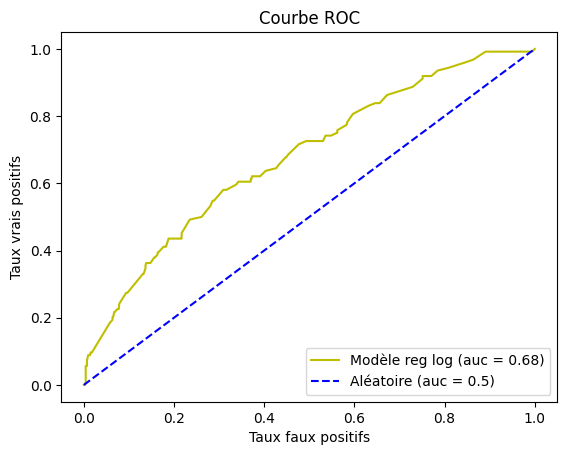

In [12]:
# Construire la courbe ROC et calculer l'AUC
from sklearn.metrics import roc_curve, roc_auc_score, auc
import numpy as np

probs = model.predict_proba(X_test_encoded)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1],pos_label=1)
roc_auc = roc_auc_score(y_test, probs[:,1])
roc_auc = auc(fpr,tpr) # Au choix

plt.title('Courbe ROC')
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.plot(fpr,tpr,"y",label=f"Modèle reg log (auc = {np.round(roc_auc,2)})")
plt.plot(fpr,fpr,"b--",label='Aléatoire (auc = 0.5)')
plt.legend(loc="lower right")
plt.show()

### Bonus : modification du seuil de décision

In [13]:
# On veut améliorer la détection des cas positifs en diminuant le seuil de décision à 0,3
y_pred_03 = (probs[:,1] > 0.3).astype(int)

# Afficher la matrice de confusion
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_03)
print(conf_matrix)

# Afficher l'accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_03)
print(accuracy)

# Afficher le rapport de classification
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred_03)
print(class_report)

[[670  54]
 [ 96  28]]
0.8231132075471698
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       724
           1       0.34      0.23      0.27       124

    accuracy                           0.82       848
   macro avg       0.61      0.58      0.59       848
weighted avg       0.80      0.82      0.81       848

